In [1]:
import warnings
warnings.filterwarnings('ignore')

# Defining Data Directory Path

In [2]:
import os
from pathlib import Path

In [3]:
DATA_DIRECTORY = Path('Data')
TRAIN_CSV = os.path.join(DATA_DIRECTORY,"train.csv")
TEST_CSV = os.path.join(DATA_DIRECTORY,"test.csv")

# Loading the Data

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Information

In [6]:
train_df.shape

(45211, 17)

In [7]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
train_df.isnull().mean()*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

#### `No Missing values found in the data`

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### `Numerical Features --> 7`
#### `Categorical Features --> 10`

# Spliting Numerical and Categorical Data

In [10]:
numerical_df = train_df.select_dtypes(exclude='object')
numerical_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [11]:
categorical_df = train_df.select_dtypes(include='object')
categorical_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


# Numerical Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

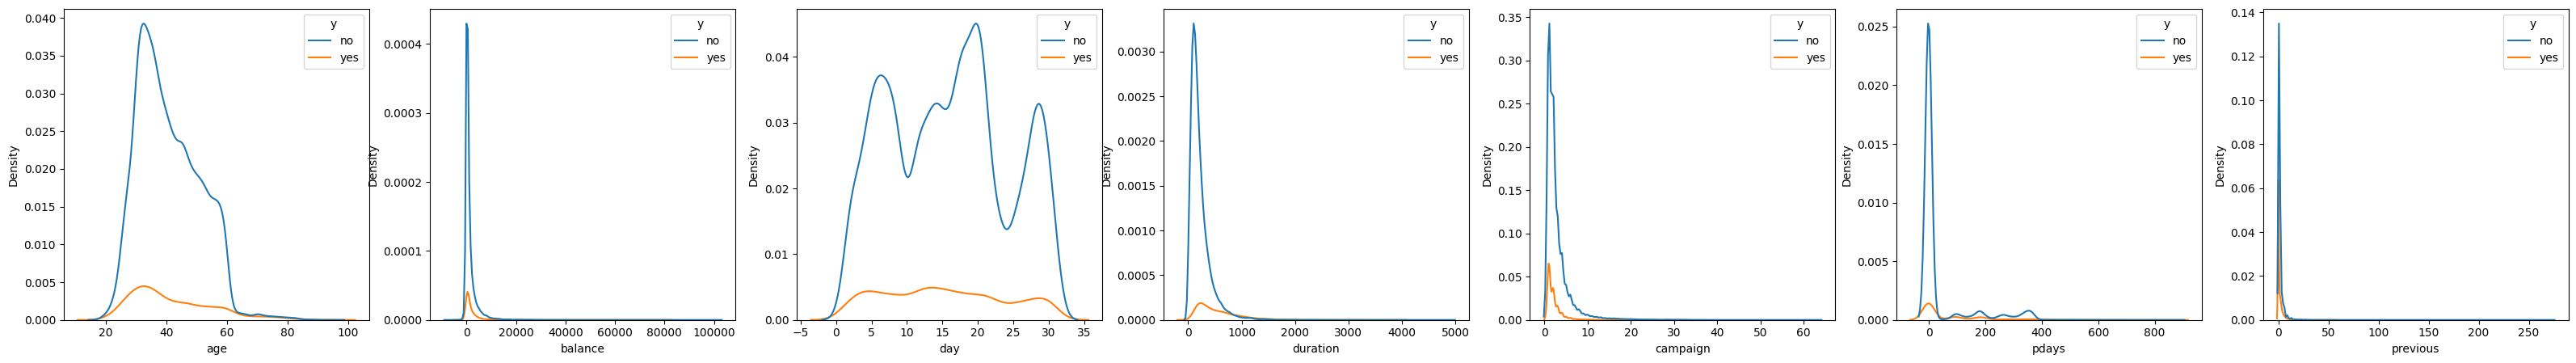

In [13]:
plt.figure(figsize=(40,5))

columns = numerical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1) 
    sns.kdeplot(data = train_df,x = col,hue= "y")

#### `From KDE we can deduce that there is no difference in range of age, day, duration, pdays and previous for people opting and not opting for TERM-DEPOSIT`

# Categorical Analysis

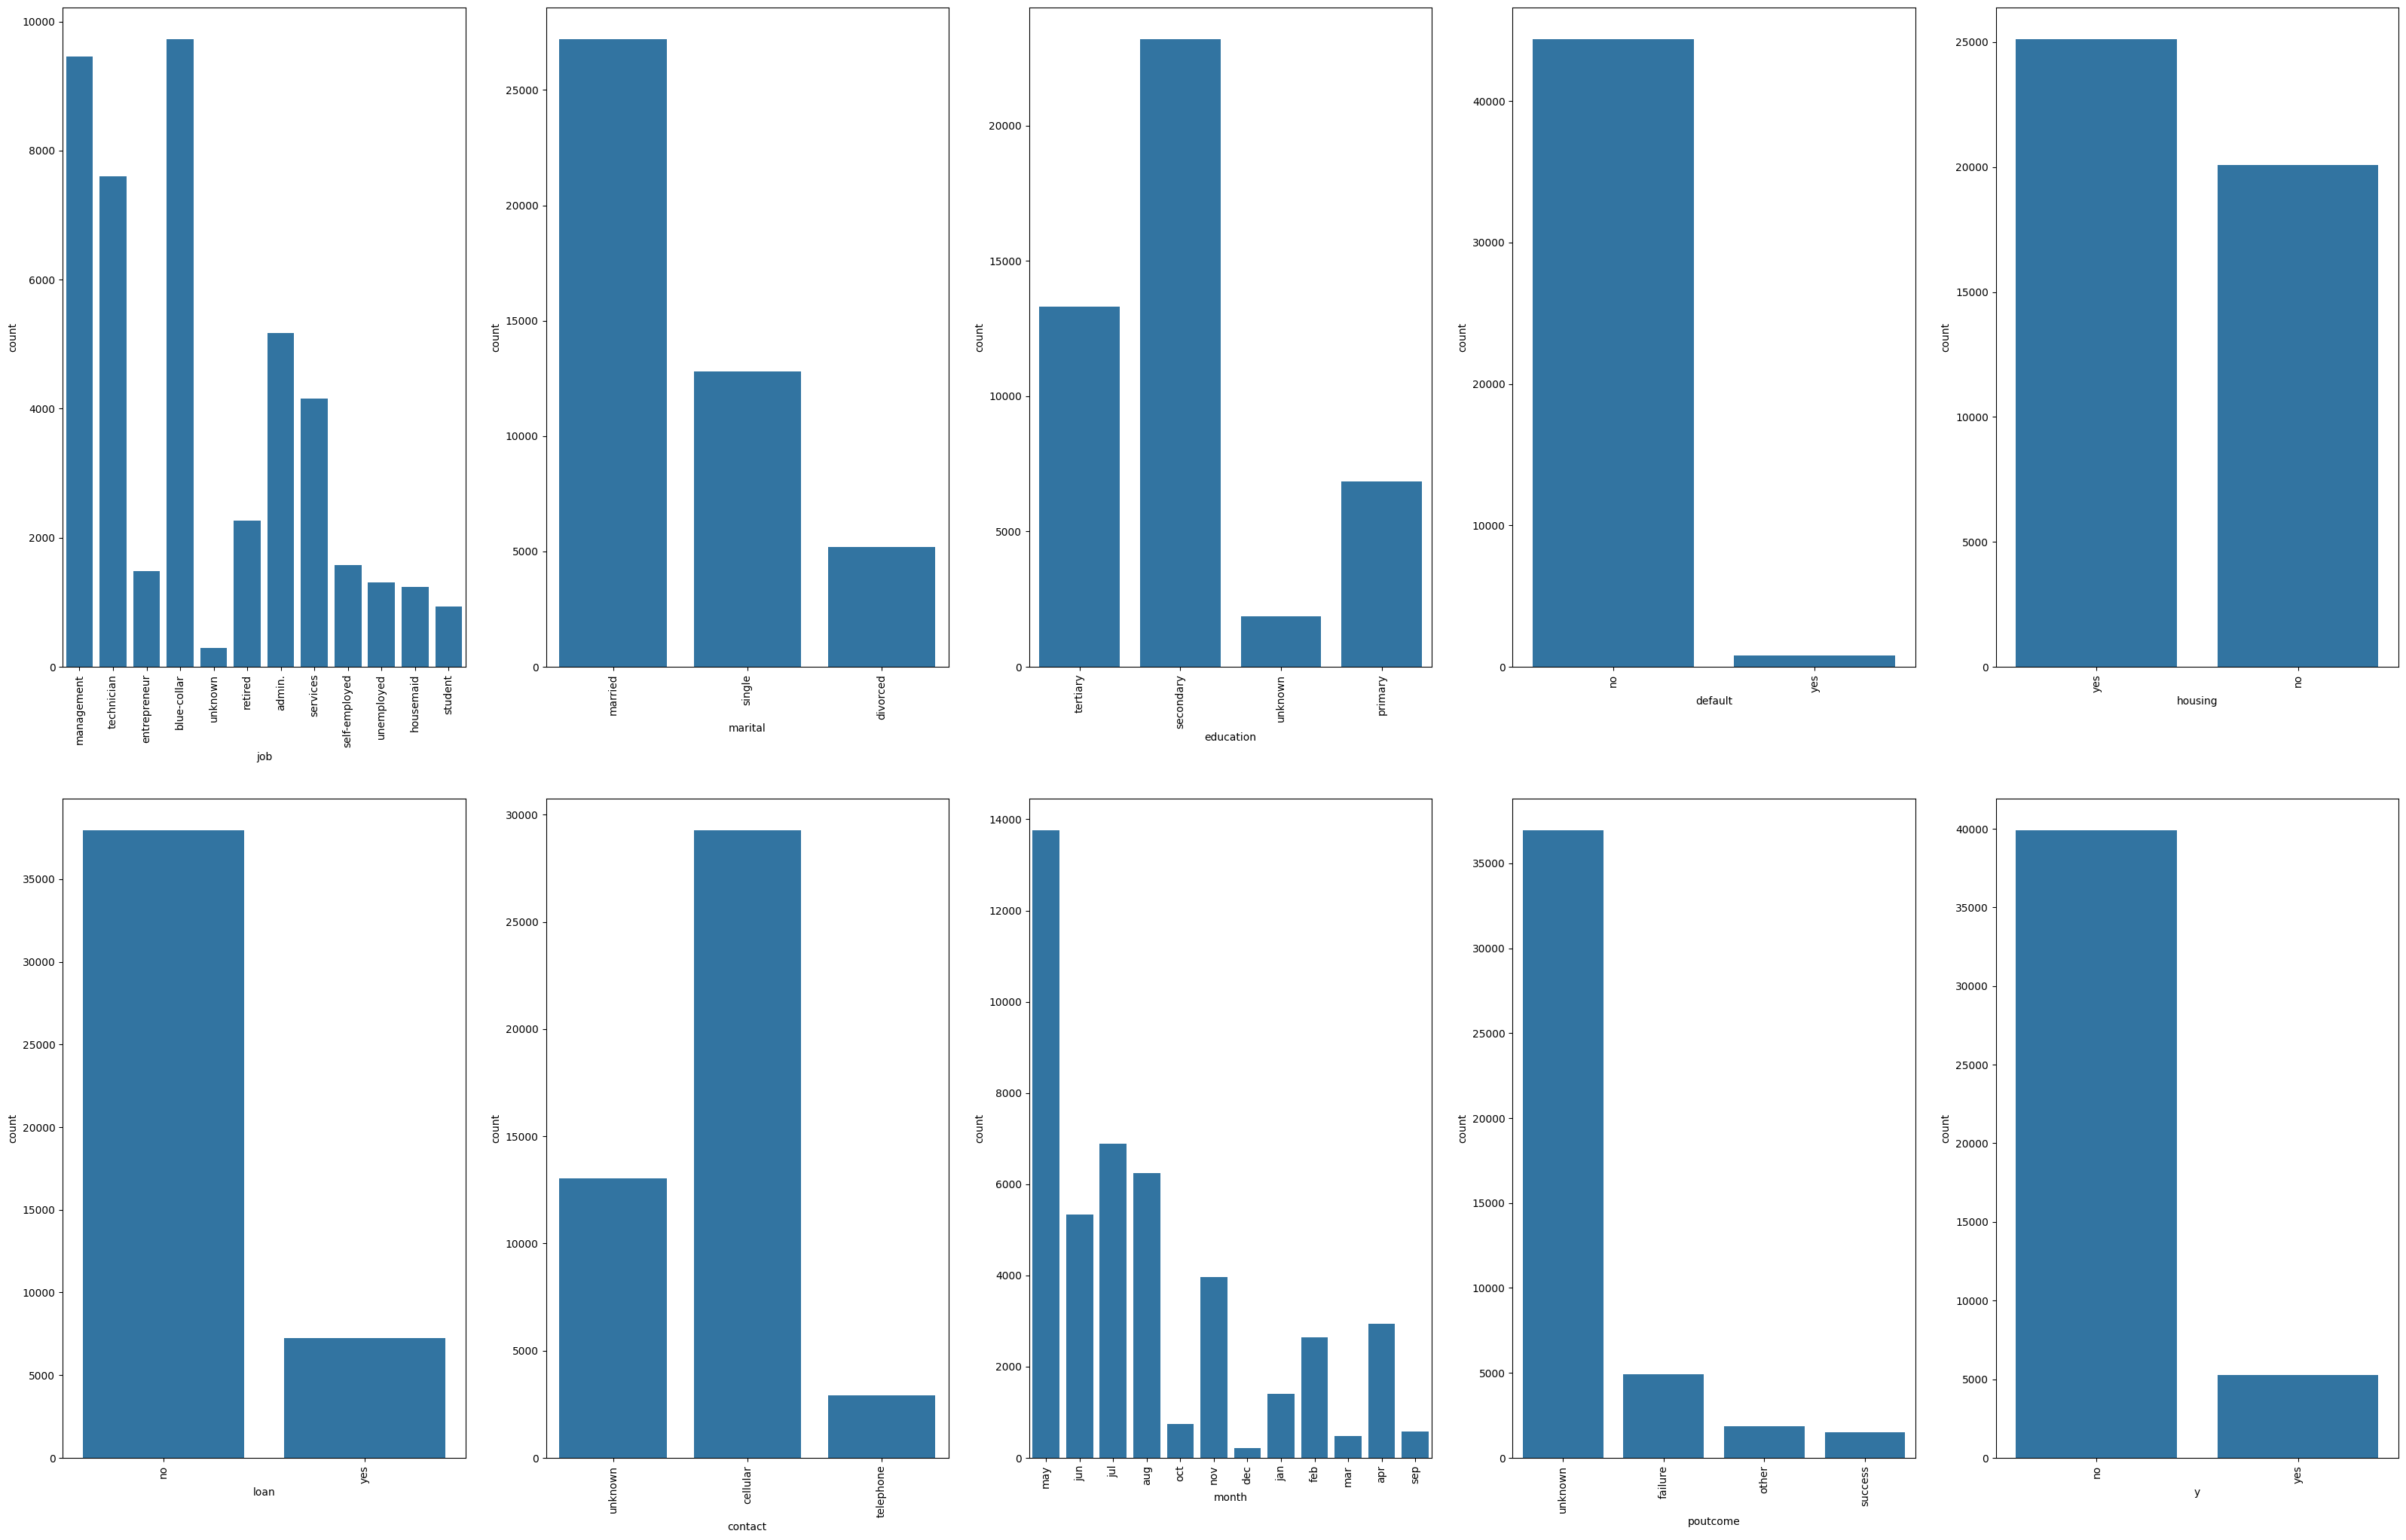

In [14]:
plt.figure(figsize=(40,25))

columns = categorical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(2,5,idx+1) 
    sns.countplot(data = categorical_df,x=col)
    plt.xticks(rotation = 90)

#### `From above we can get to know that data is imbalanced and insights dran from such data will be a biased insight`

## Balancing the data

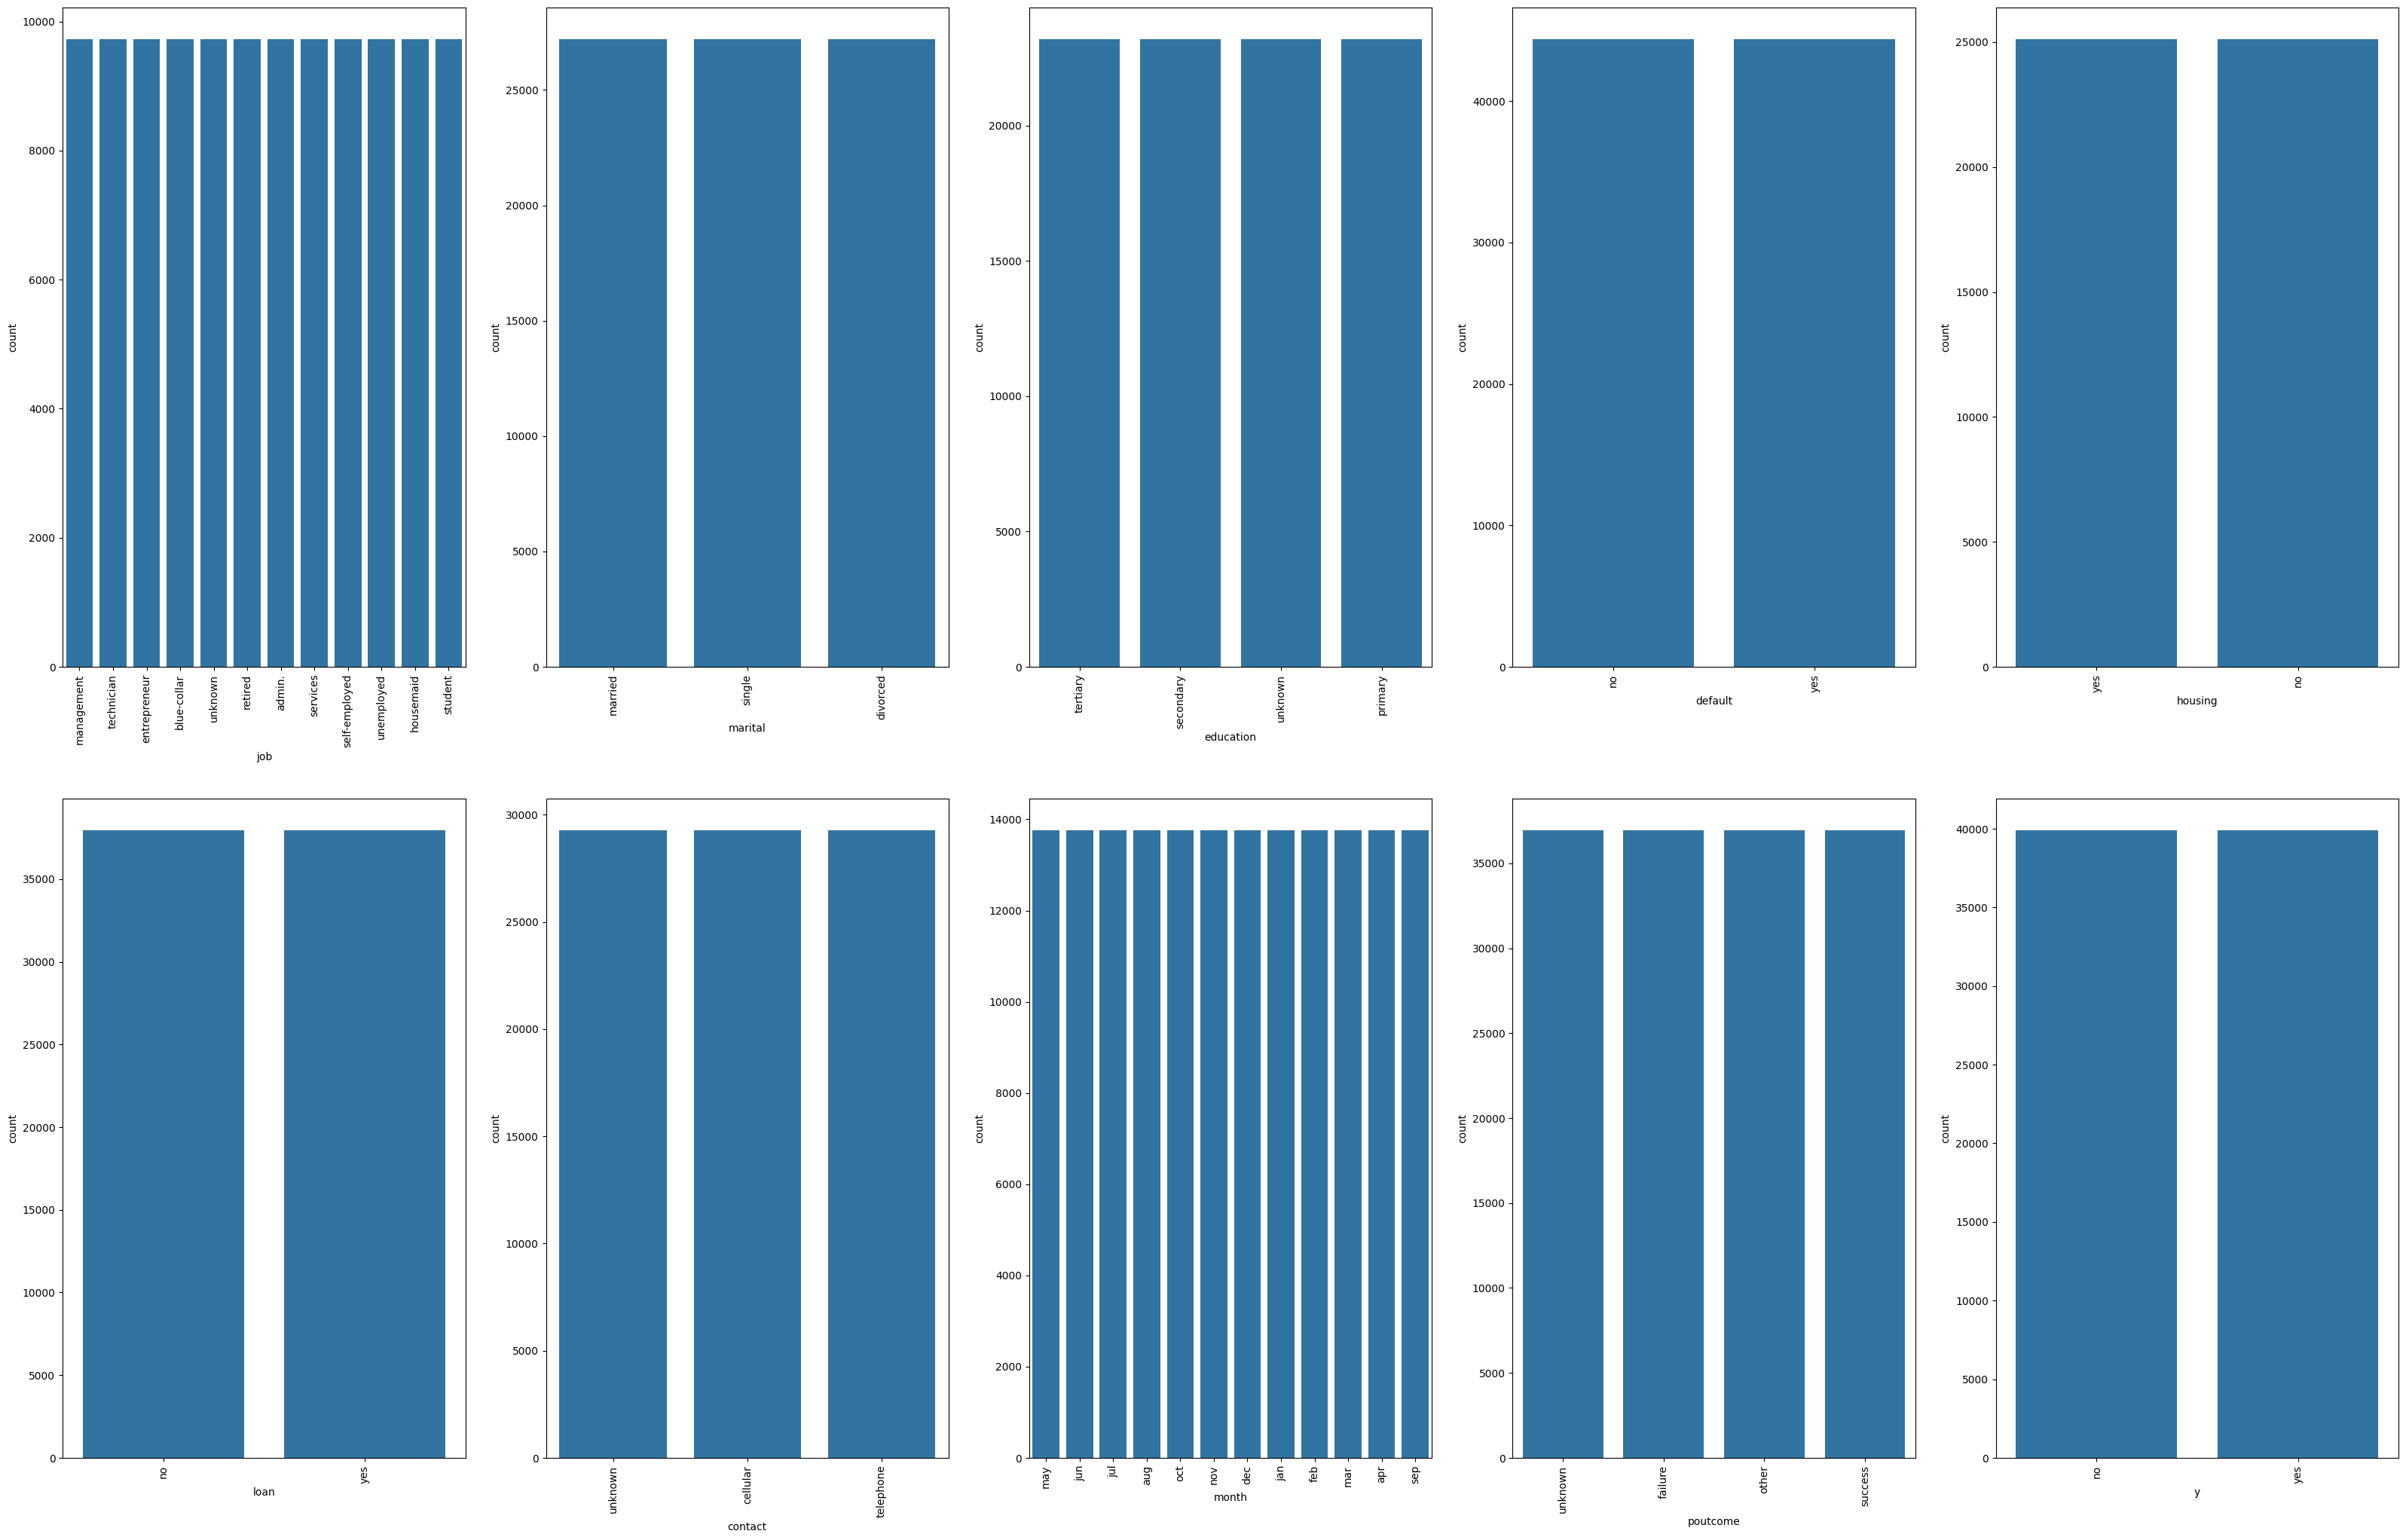

In [15]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data,x=col)
    plt.xticks(rotation = 90)

    idx+=1
            

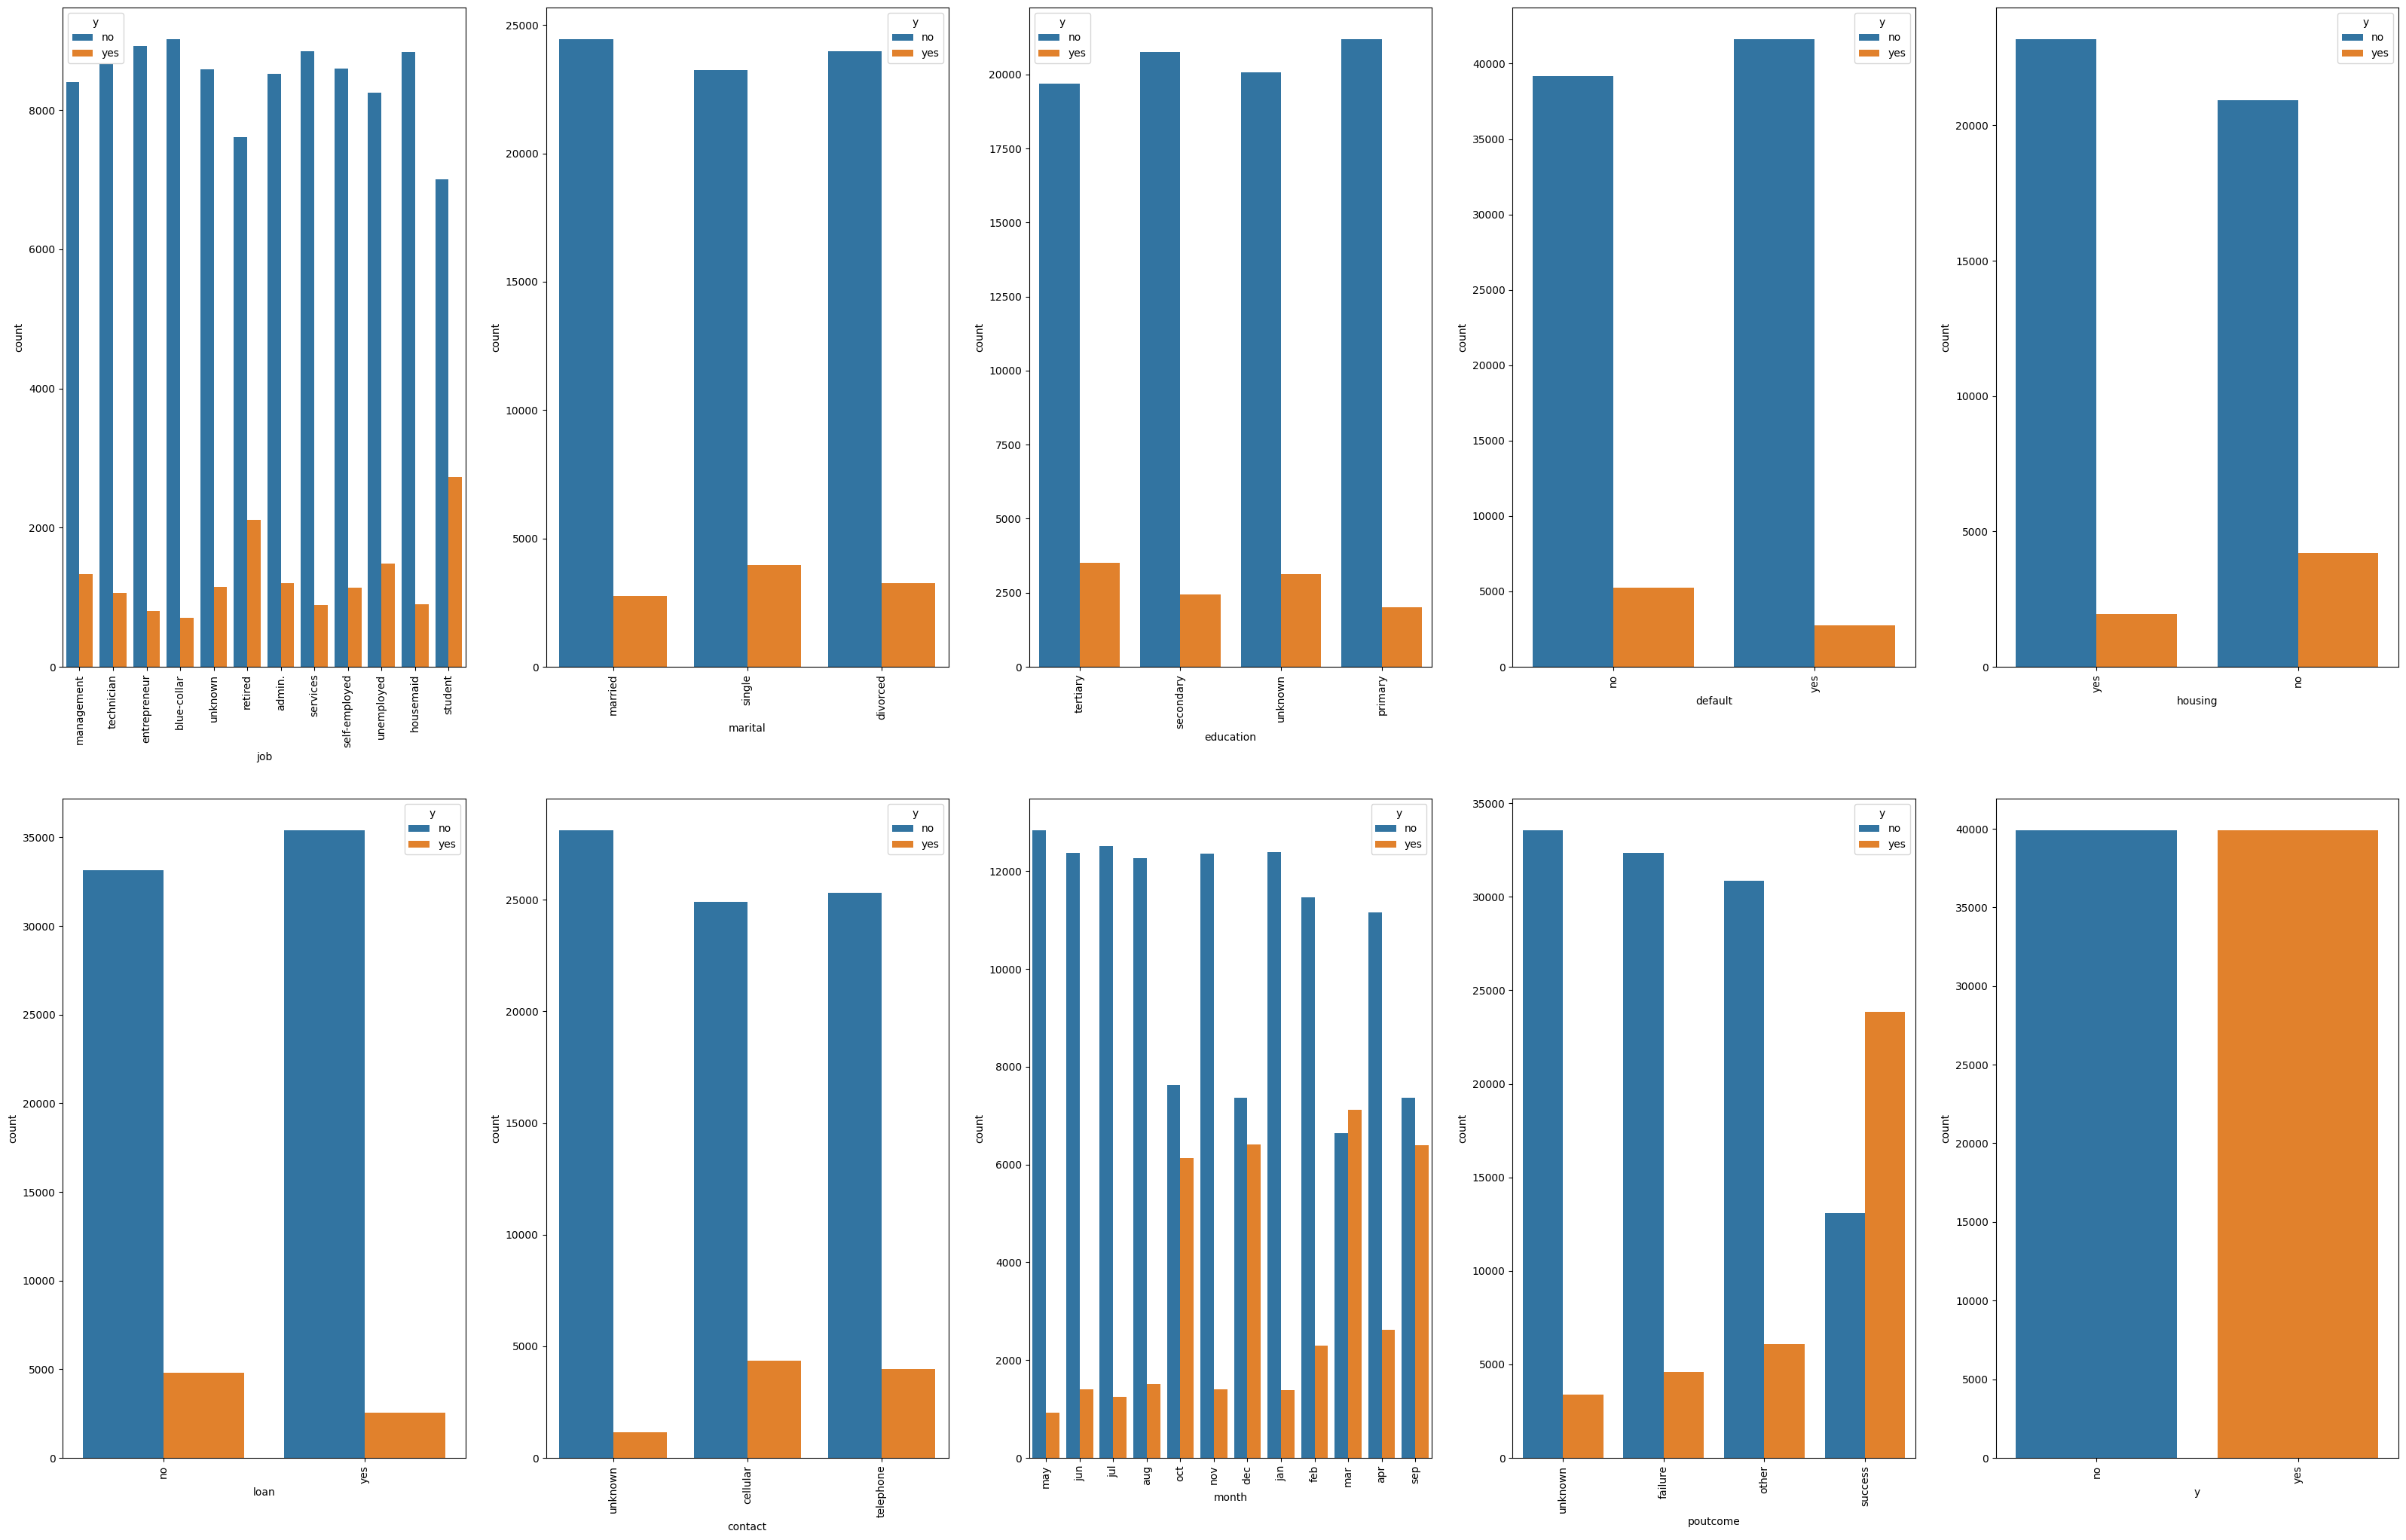

In [16]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data,x=col,hue = "y")
    plt.xticks(rotation = 90)

    idx+=1
            


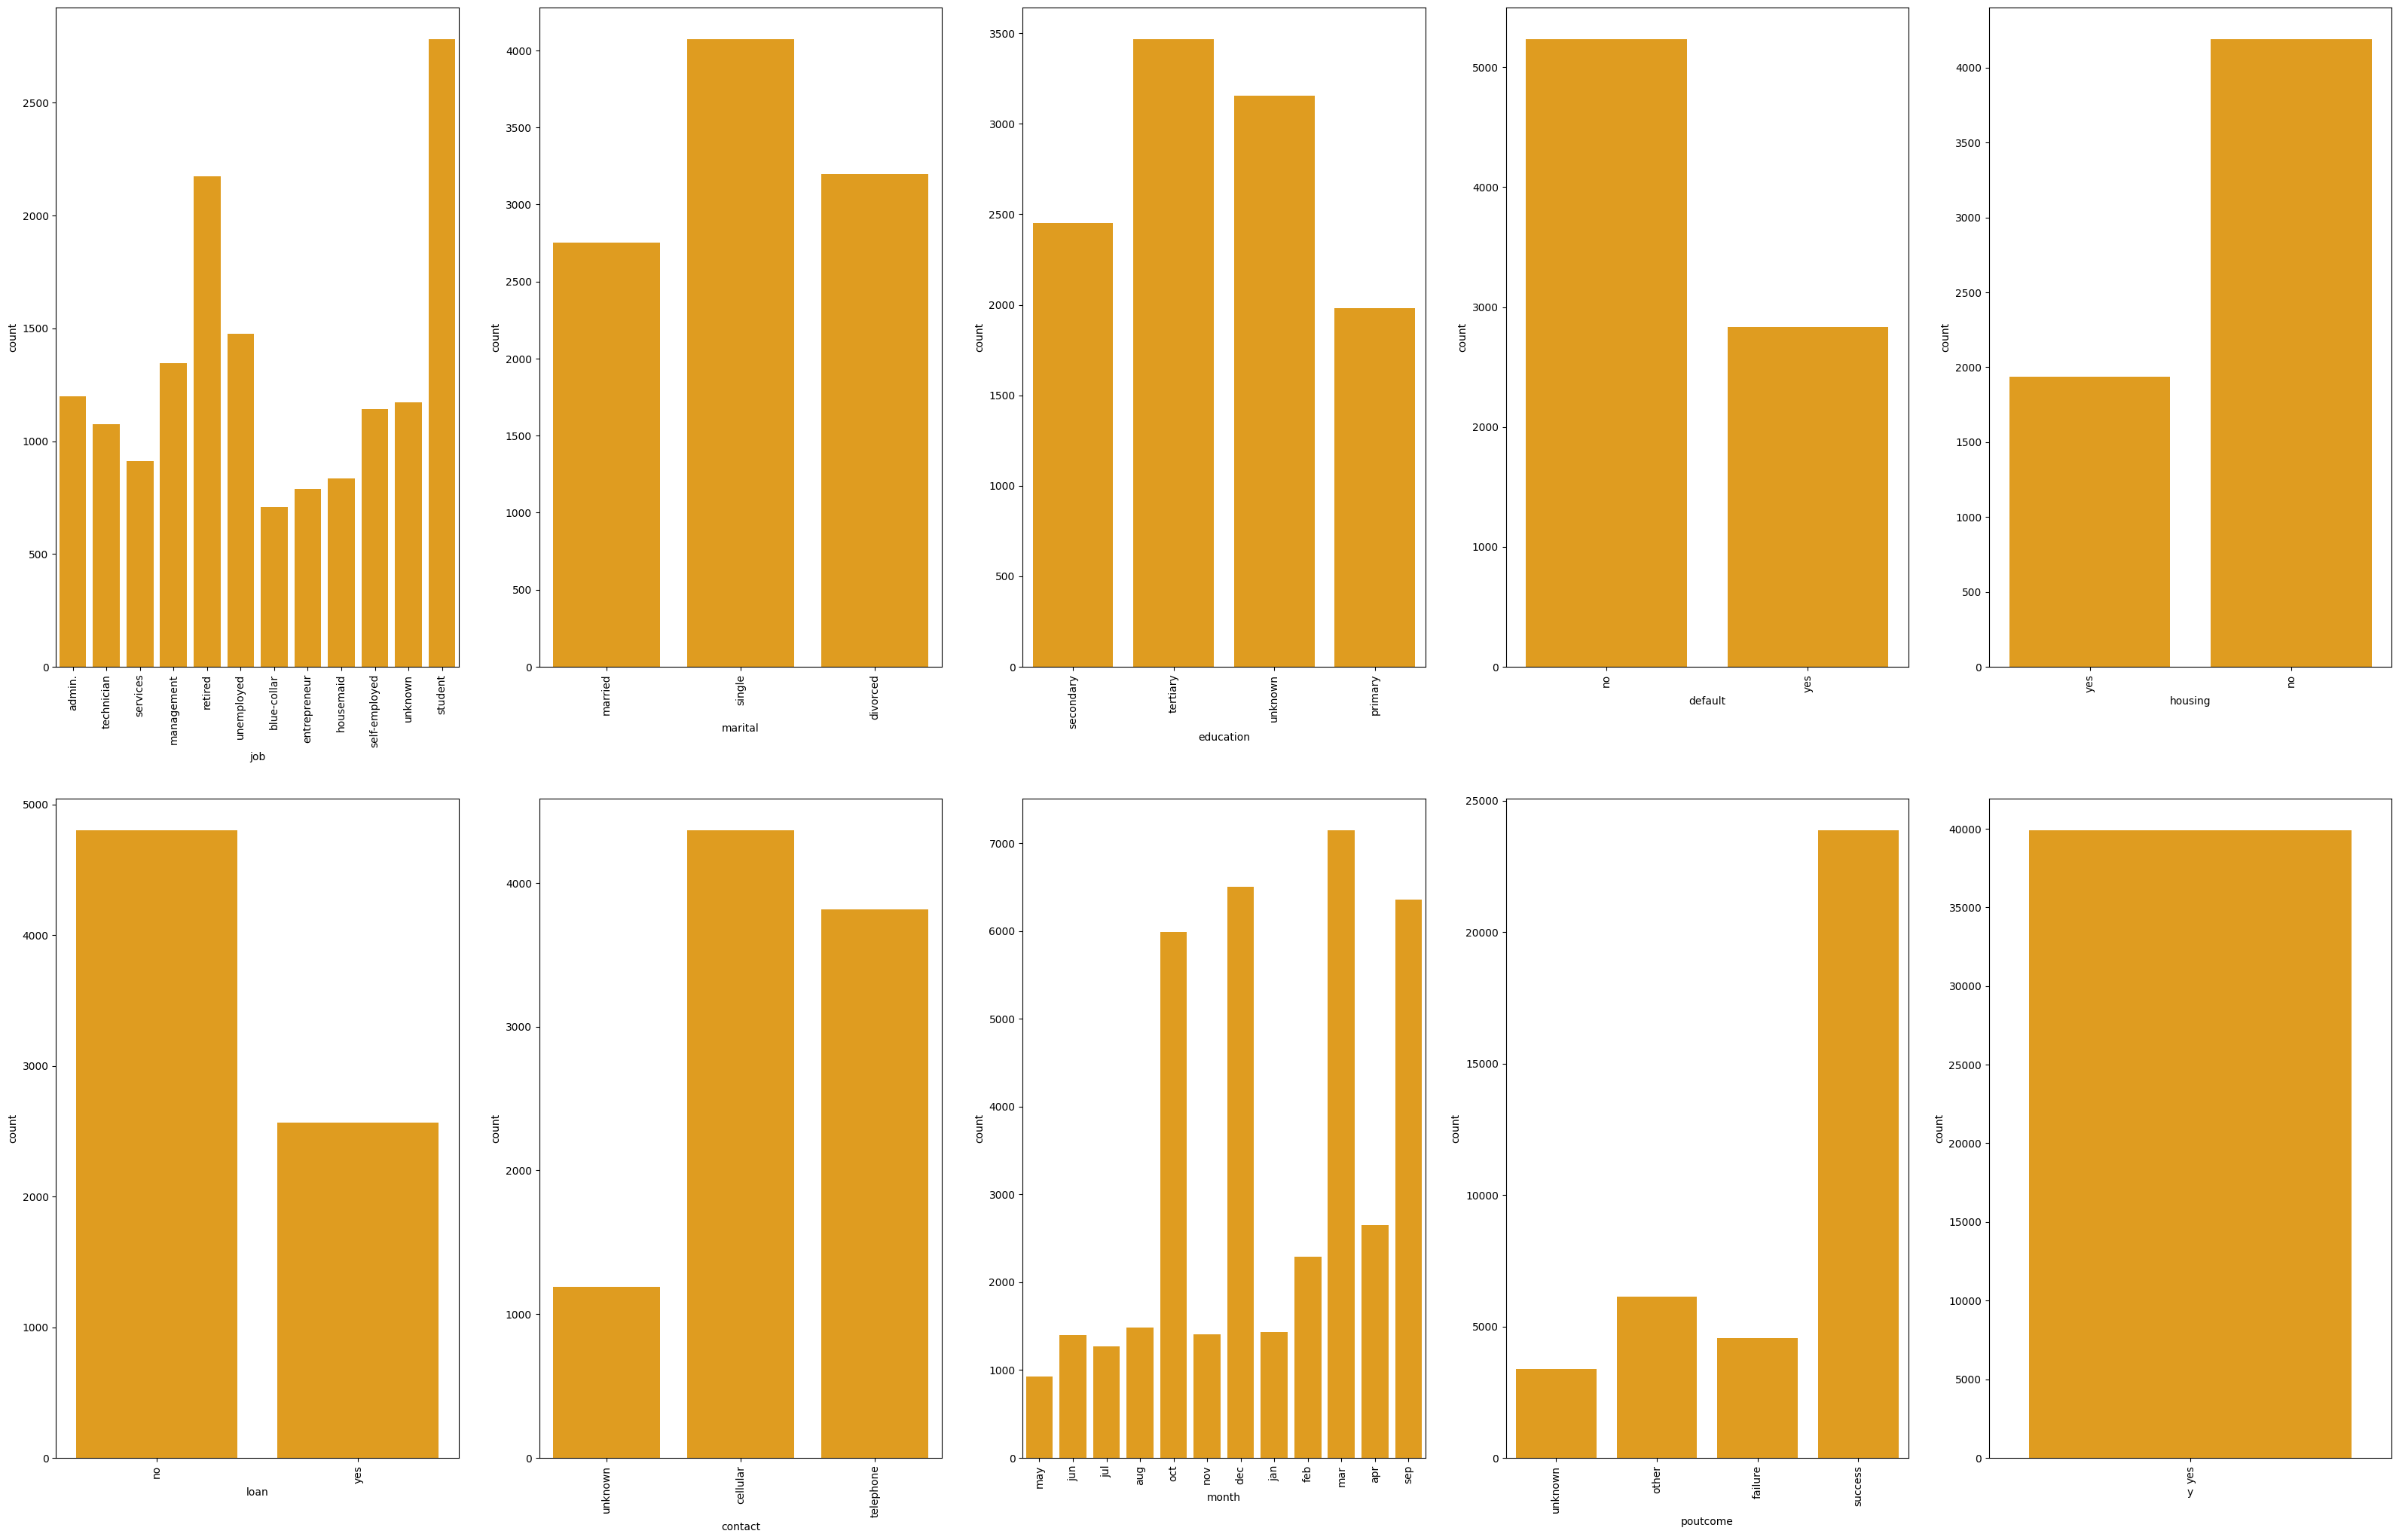

In [17]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data[temp_balanced_data["y"]=="yes"],x=col,color="orange")
    plt.xticks(rotation = 90)

    idx+=1
            


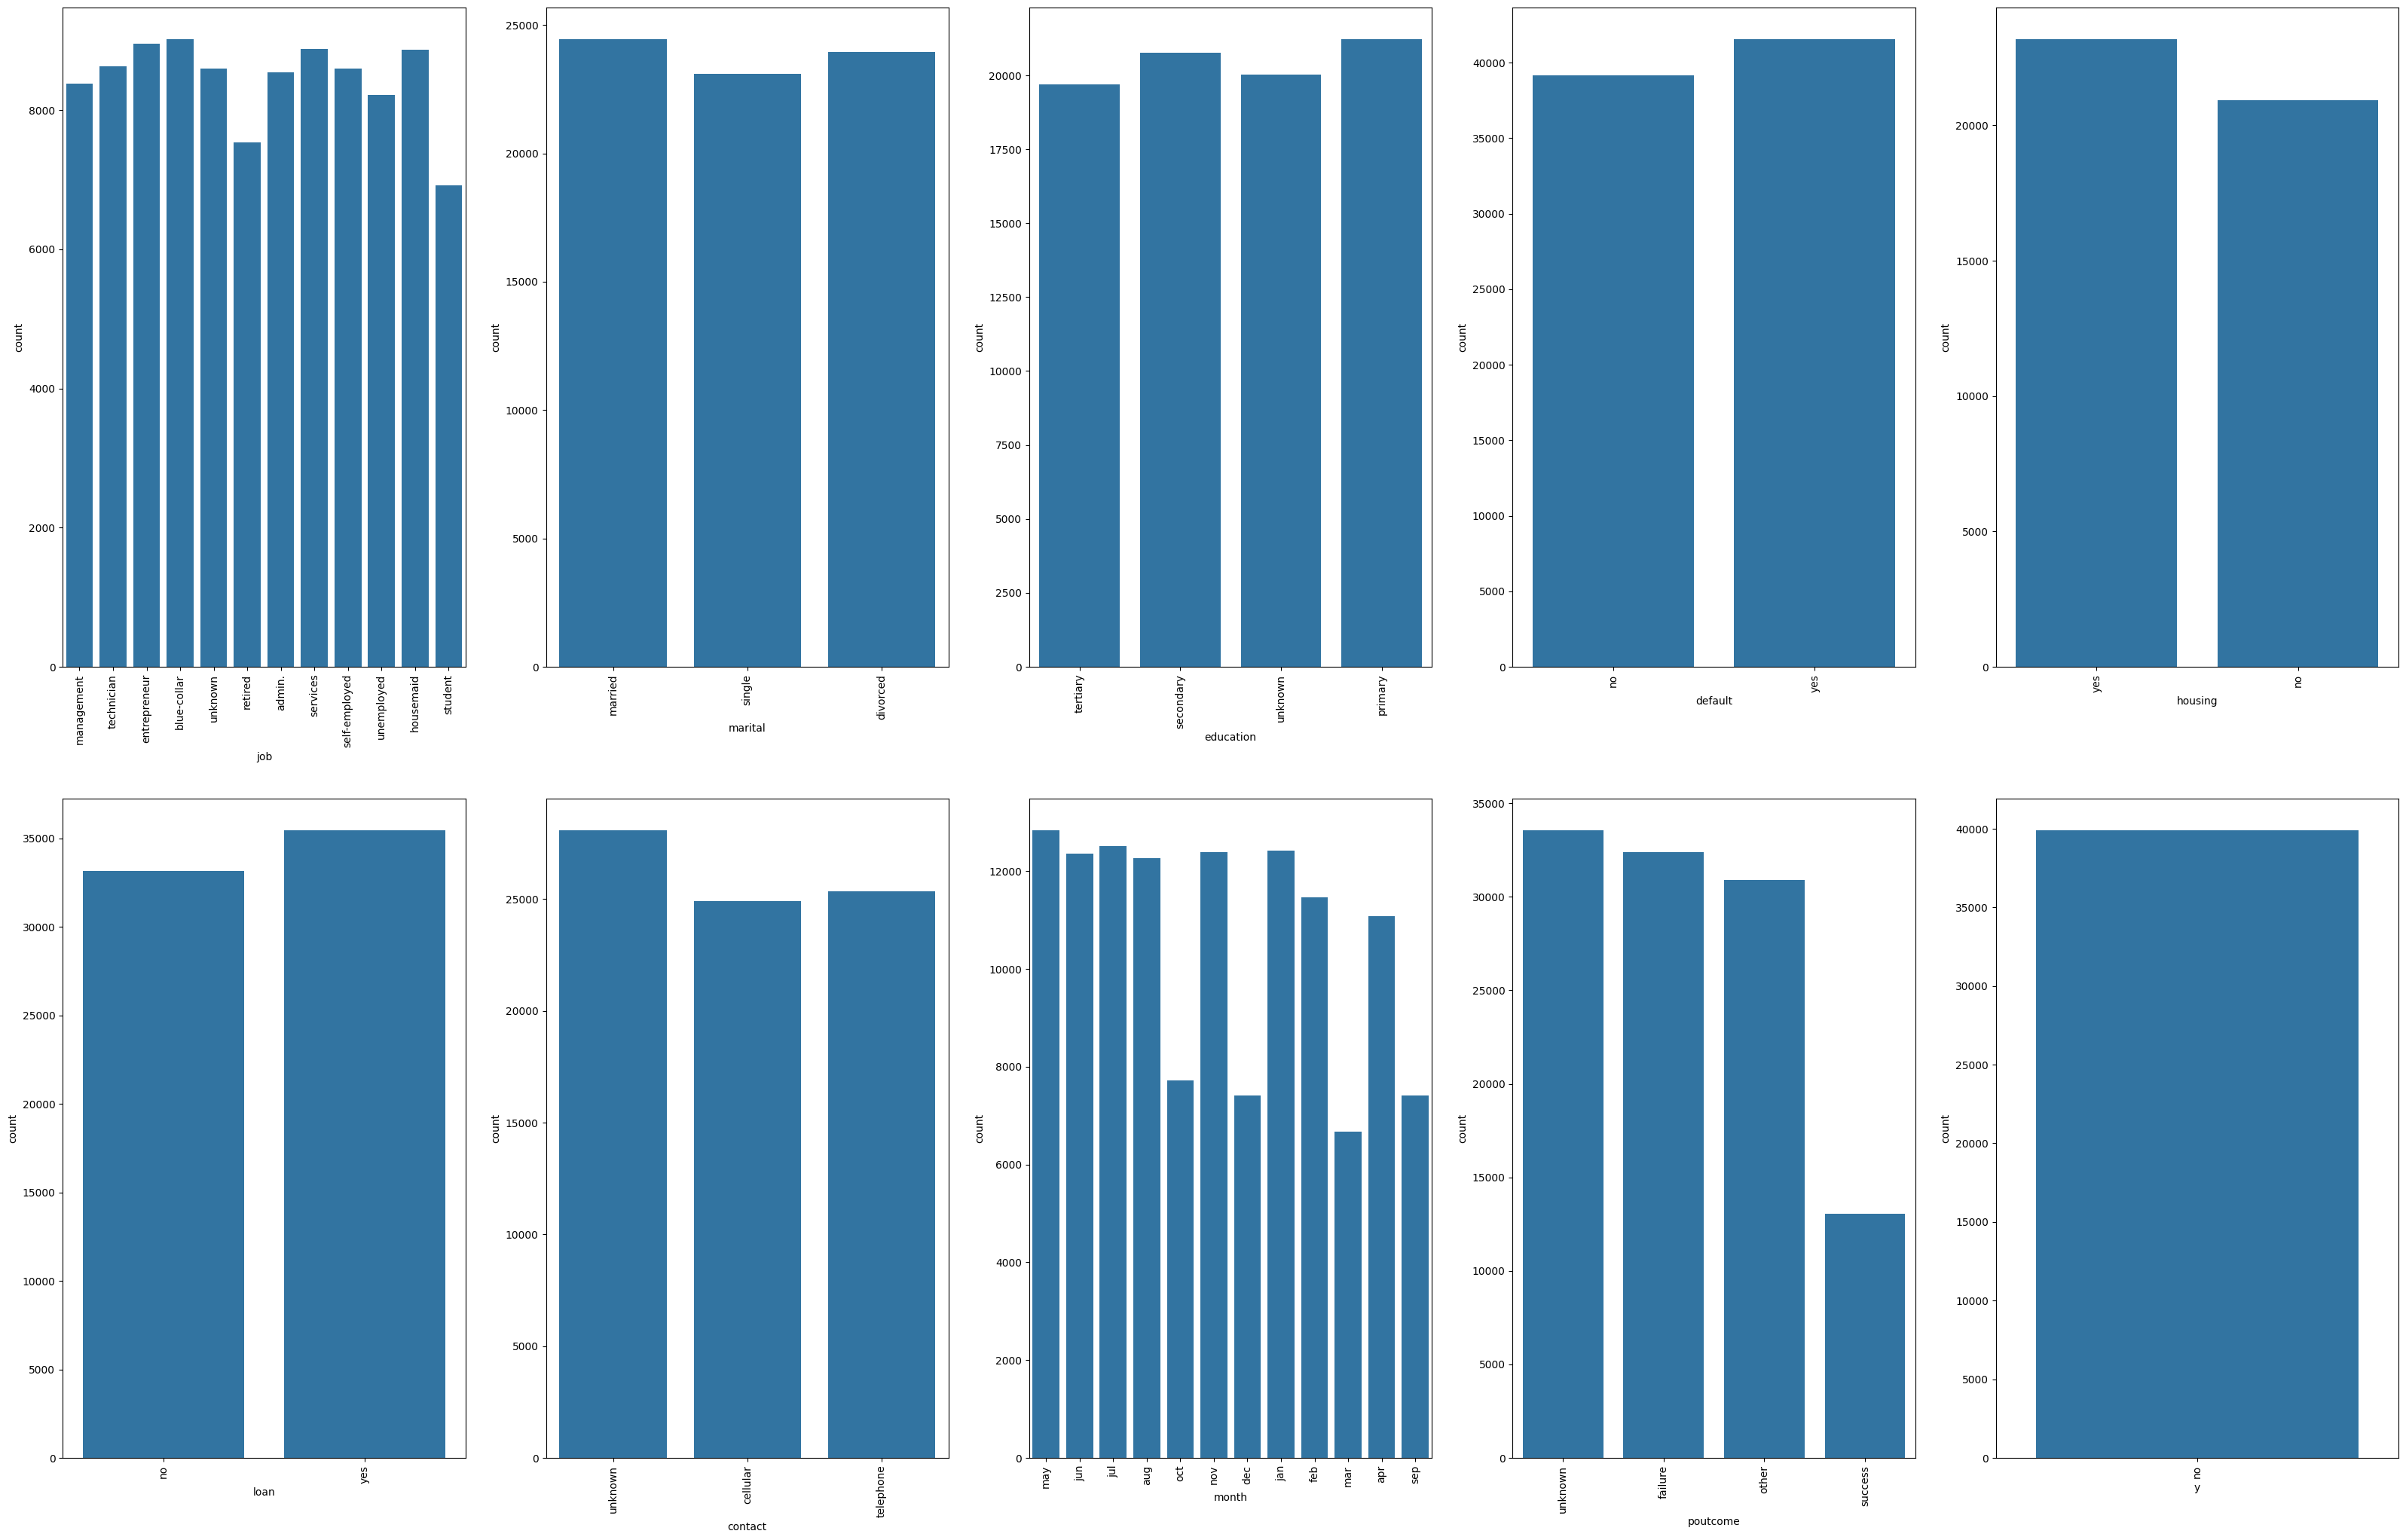

In [19]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data[temp_balanced_data["y"]=="no"],x=col)
    plt.xticks(rotation = 90)

    idx+=1
            


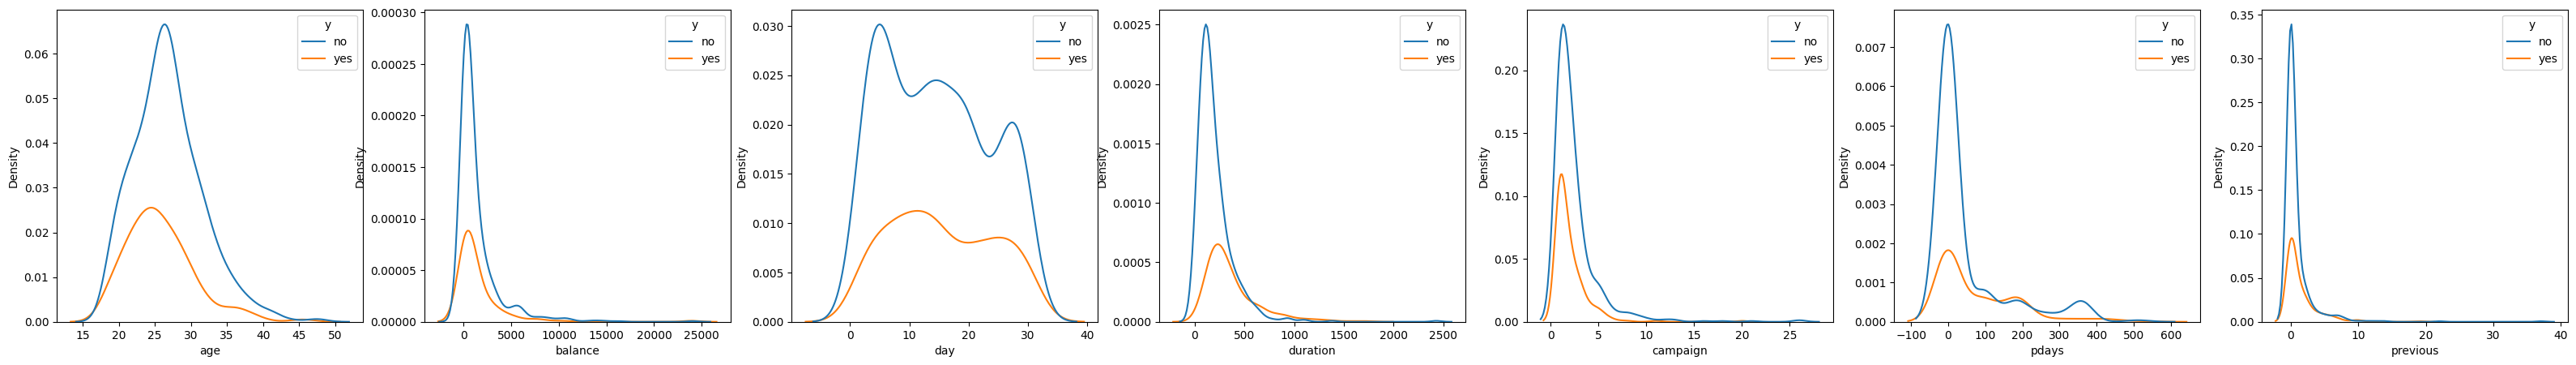

In [26]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[train_df["job"]=="student"],x = col,hue="y")

In [19]:
subscribed_df = train_df[train_df["y"]=="yes"]
subscribed_df.shape

(5289, 17)

In [20]:
not_subscribed_df = train_df[train_df["y"]=="no"]
not_subscribed_df.shape

(39922, 17)

In [21]:
numerical_subscribed_df = subscribed_df.select_dtypes(exclude="object")
categorical_subscribed_df = subscribed_df.select_dtypes(include="object")

In [22]:
numerical_not_subscribed_df = not_subscribed_df.select_dtypes(exclude="object")
categorical_not_subscribed_df = not_subscribed_df.select_dtypes(include="object")

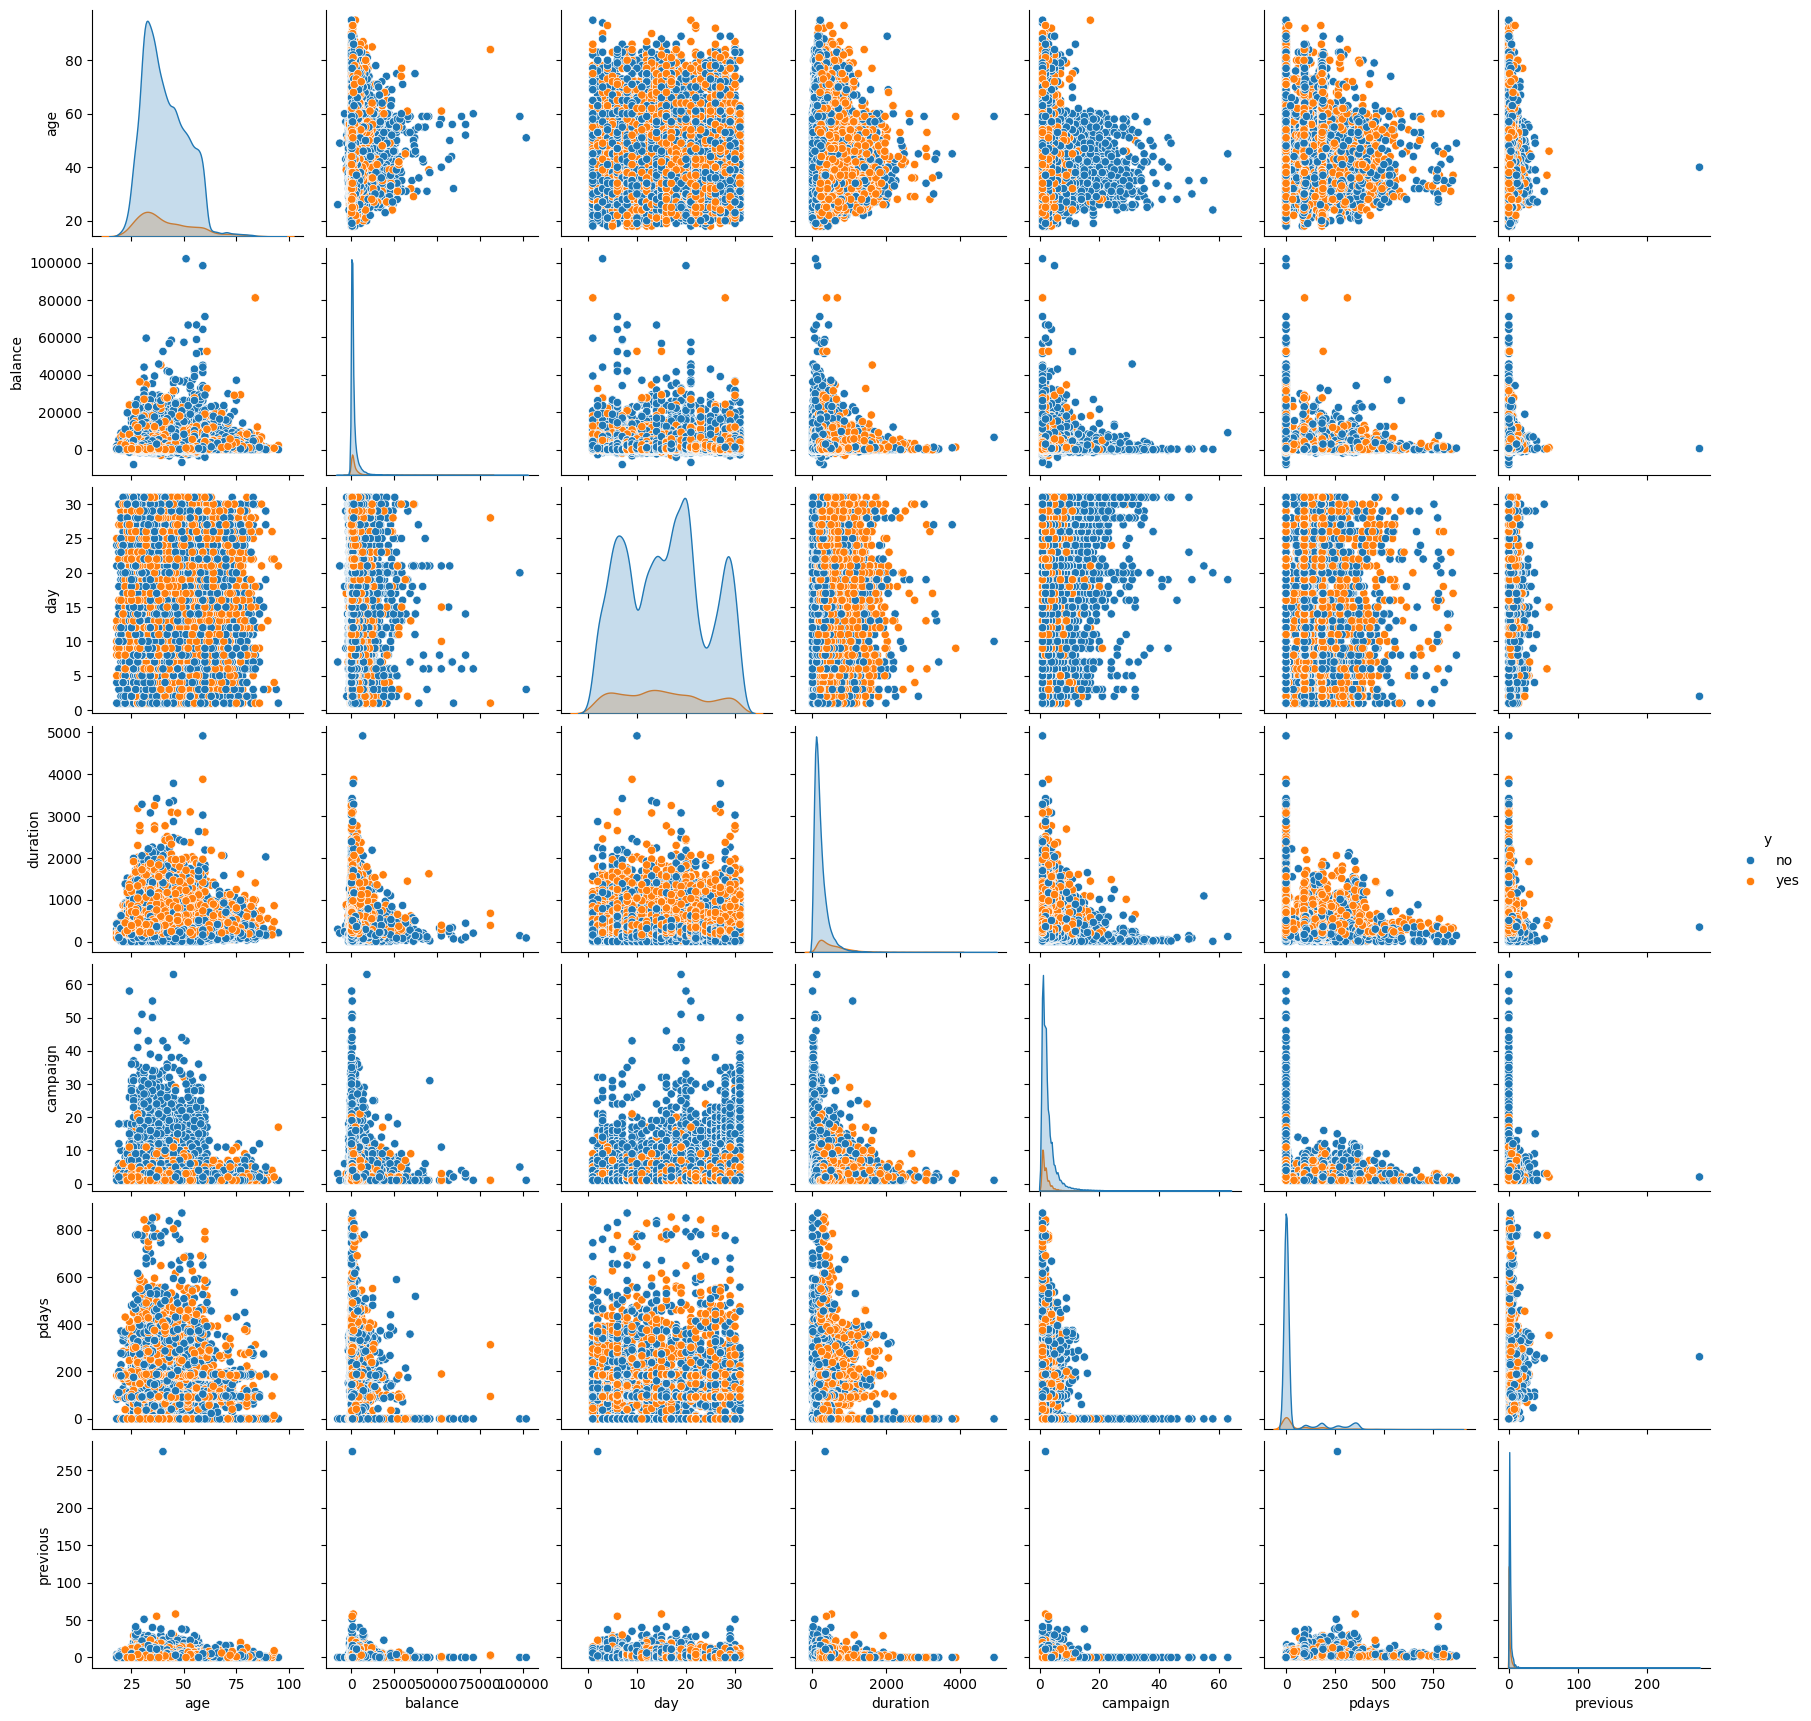

In [30]:
sns.pairplot(train_df,hue="y")

In [ ]:
balance,campaign,duration,